In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Đọc file dữ liệu
df = pd.read_csv('Platinum.csv')
df.head(5)

,Open,Close,High,Low,Date
0,933.5,930.5,933.5,930.5,1/1/2018
1,931.0,945.5,946.5,931.0,1/2/2018
2,945.0,957.0,961.0,940.5,1/3/2018
3,955.0,964.0,966.5,945.0,1/4/2018
4,963.0,969.5,970.5,959.5,1/5/2018


In [3]:
df.describe()# Đưa về kiểu date và đánh index
df['Date'] = pd.to_datetime(df.Date)

# Sắp xếp lại index
df = df.sort_index(ascending=False)
df

,Open,Close,High,Low
count,2121.000000,2121.000000,2121.000000,2121.000000
mean,940.719642,943.916954,951.112617,931.840344
std,118.157621,104.771656,115.874605,112.997546
min,0.000000,595.000000,0.000000,0.000000
25%,870.500000,873.000000,883.000000,863.500000
50%,933.000000,933.000000,940.500000,924.500000
75%,1001.000000,1001.000000,1011.500000,991.500000
max,1305.000000,1306.000000,1340.000000,1275.000000


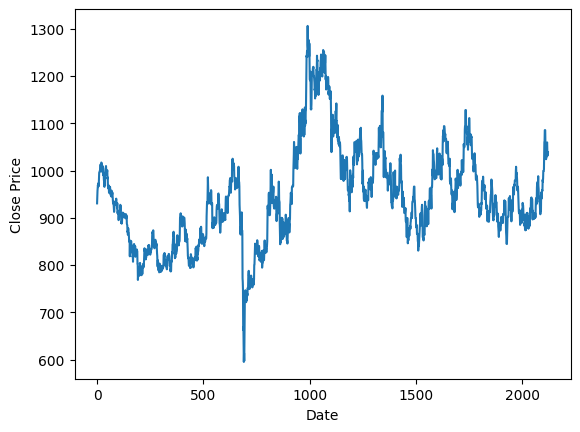

In [6]:
# Vẽ biểu đồ chuỗi thời gian
plt.plot(df.index, df["Close"])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [7]:
df = df[['Close']]
df = df.dropna()
df = df.reset_index(drop=True)
df.head(5)

,Close
0,930.5
1,945.5
2,957.0
3,964.0
4,969.5


In [8]:
#Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [9]:
# Chia train test theo tỉ lệ 6:4
# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(0.6 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [10]:
train_data

array([[0.4718706 ],
       [0.49296765],
       [0.50914205],
       ...,
       [0.45850914],
       [0.48734177],
       [0.48523207]])

In [11]:
# Chuẩn bị dữ liệu cho x,y
def create_dataset(dataset, lags=1):
    X, Y = [], []
    for i in range(len(dataset)-lags-1):
        a = dataset[i:(i+lags), 0]
        X.append(a)
        Y.append(dataset[i + lags, 0])
    return np.array(X), np.array(Y)

In [12]:
#Thiết lập tham số cho model
lags = 30 
X_train, y_train = create_dataset(train_data, lags)
X_test, y_test = create_dataset(test_data, lags)

In [13]:
X_test

array([[0.48523207, 0.48874824, 0.48101266, ..., 0.60759494, 0.62869198,
        0.61603376],
       [0.48874824, 0.48101266, 0.48171589, ..., 0.62869198, 0.61603376,
        0.61603376],
       [0.48101266, 0.48171589, 0.53516174, ..., 0.61603376, 0.61603376,
        0.6230661 ],
       ...,
       [0.45077356, 0.50421941, 0.48523207, ..., 0.61462729, 0.65049226,
        0.6533052 ],
       [0.50421941, 0.48523207, 0.49507736, ..., 0.65049226, 0.6533052 ,
        0.62658228],
       [0.48523207, 0.49507736, 0.50562588, ..., 0.6533052 , 0.62658228,
        0.61392405]])

In [14]:
#In thông tin kích thước của dữ liệu
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1241, 30) (1241,)
(818, 30) (818,)


In [15]:
#Huấn luyện model SVR
model = SVR(kernel='linear', C=10, gamma=0.01)
model.fit(X_train, y_train)

SVR(C=10, gamma=0.01, kernel='linear')

In [16]:
#Dự báo dự liệu dựa trên tập test
y_pred = model.predict(X_test)
#y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()

In [18]:
# 10. Đánh giá độ chính xác thuật toán bằng MAPE, MSE và RMSE
#MAPE
test_mape = mean_absolute_percentage_error(y_pred, y_test)
#MSE
test_mse = mean_squared_error(y_pred, y_test)
#RMSE
test_rmse = np.sqrt(test_mse)

print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)
print('Testing RMSE:', test_rmse)

Testing MAPE: 0.04291919462168189
Testing MSE: 0.0007340478550817425
Testing RMSE: 0.027093317535542644


In [19]:
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1)).flatten()
y_pred

array([1029.85078958, 1031.84385092, 1030.16049259, 1026.30505452,
       1031.21833539, 1032.96693083, 1028.64013995, 1020.84510615,
       1021.772522  , 1030.12616404, 1042.42059912, 1054.82790974,
       1056.06761941, 1041.62518336, 1033.60092703, 1029.81277711,
       1038.38186902, 1041.91674184, 1034.56785332, 1027.57756085,
       1022.11401124, 1024.45437033, 1026.41348079, 1050.42394751,
       1077.97243298, 1077.92294204, 1071.72010171, 1068.07030947,
       1071.53871196, 1082.89597101, 1072.41440766, 1065.87675402,
       1054.86241838, 1051.15904042, 1064.36746936, 1074.30816905,
       1093.91022995, 1117.75205814, 1121.79102878, 1129.21608093,
       1123.54580903, 1137.66268139, 1112.30297207, 1082.1990437 ,
       1070.76900547, 1069.53721138, 1060.35749627, 1020.8174059 ,
       1035.1109105 , 1039.89422429, 1054.619926  , 1053.03118815,
       1045.69753976, 1040.72099671, 1032.80495911, 1017.22471077,
        995.22078532,  981.53881253,  966.48413046,  959.78612

In [20]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
lags=30
i=0
while(i<30):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output.append(yhat)
        i=i+1


0 day input [0.50562588 0.51125176 0.51125176 0.50914205 0.54219409 0.53656821
 0.54571027 0.56821378 0.56821378 0.56821378 0.57313643 0.62025316
 0.65471167 0.65682138 0.68987342 0.68987342 0.68987342 0.64556962
 0.64205345 0.62587904 0.60337553 0.60970464 0.60970464 0.61462729
 0.65049226 0.6533052  0.62658228 0.61392405 0.62376934 0.62376934]
0 day output 0.6352104818125639
1 day input [0.51125176 0.51125176 0.50914205 0.54219409 0.53656821 0.54571027
 0.56821378 0.56821378 0.56821378 0.57313643 0.62025316 0.65471167
 0.65682138 0.68987342 0.68987342 0.68987342 0.64556962 0.64205345
 0.62587904 0.60337553 0.60970464 0.60970464 0.61462729 0.65049226
 0.6533052  0.62658228 0.61392405 0.62376934 0.62376934 0.63521048]
1 day output 0.6323071143601791
2 day input [0.51125176 0.50914205 0.54219409 0.53656821 0.54571027 0.56821378
 0.56821378 0.56821378 0.57313643 0.62025316 0.65471167 0.65682138
 0.68987342 0.68987342 0.68987342 0.64556962 0.64205345 0.62587904
 0.60337553 0.60970464 0.60

In [21]:
# 13. Dự báo 60 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
lags=30
i=0
while(i<60):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_60.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_60.append(yhat)
        i=i+1


0 day input [0.50562588 0.51125176 0.51125176 0.50914205 0.54219409 0.53656821
 0.54571027 0.56821378 0.56821378 0.56821378 0.57313643 0.62025316
 0.65471167 0.65682138 0.68987342 0.68987342 0.68987342 0.64556962
 0.64205345 0.62587904 0.60337553 0.60970464 0.60970464 0.61462729
 0.65049226 0.6533052  0.62658228 0.61392405 0.62376934 0.62376934]
0 day output 0.6352104818125639
1 day input [0.51125176 0.51125176 0.50914205 0.54219409 0.53656821 0.54571027
 0.56821378 0.56821378 0.56821378 0.57313643 0.62025316 0.65471167
 0.65682138 0.68987342 0.68987342 0.68987342 0.64556962 0.64205345
 0.62587904 0.60337553 0.60970464 0.60970464 0.61462729 0.65049226
 0.6533052  0.62658228 0.61392405 0.62376934 0.62376934 0.63521048]
1 day output 0.6323071143601791
2 day input [0.51125176 0.50914205 0.54219409 0.53656821 0.54571027 0.56821378
 0.56821378 0.56821378 0.57313643 0.62025316 0.65471167 0.65682138
 0.68987342 0.68987342 0.68987342 0.64556962 0.64205345 0.62587904
 0.60337553 0.60970464 0.60

In [22]:
# 13. Dự báo 90 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
lags=30
i=0
while(i<90):
    if(len(temp_input)>30):
        x_input=np.array(temp_input[-lags:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat)  # Append the scalar value directly
        temp_input=temp_input[1:]
        lst_output_90.append(yhat)  # Append the scalar value directly
        i=i+1
    else:
        x_input = x_input.reshape(1,-1)
        yhat = model.predict(x_input)[0]  # Get the scalar value directly
        print(yhat)
        temp_input.append(yhat)
        print(len(temp_input))
        lst_output_90.append(yhat)
        i=i+1


0 day input [0.50562588 0.51125176 0.51125176 0.50914205 0.54219409 0.53656821
 0.54571027 0.56821378 0.56821378 0.56821378 0.57313643 0.62025316
 0.65471167 0.65682138 0.68987342 0.68987342 0.68987342 0.64556962
 0.64205345 0.62587904 0.60337553 0.60970464 0.60970464 0.61462729
 0.65049226 0.6533052  0.62658228 0.61392405 0.62376934 0.62376934]
0 day output 0.6352104818125639
1 day input [0.51125176 0.51125176 0.50914205 0.54219409 0.53656821 0.54571027
 0.56821378 0.56821378 0.56821378 0.57313643 0.62025316 0.65471167
 0.65682138 0.68987342 0.68987342 0.68987342 0.64556962 0.64205345
 0.62587904 0.60337553 0.60970464 0.60970464 0.61462729 0.65049226
 0.6533052  0.62658228 0.61392405 0.62376934 0.62376934 0.63521048]
1 day output 0.6323071143601791
2 day input [0.51125176 0.50914205 0.54219409 0.53656821 0.54571027 0.56821378
 0.56821378 0.56821378 0.57313643 0.62025316 0.65471167 0.65682138
 0.68987342 0.68987342 0.68987342 0.64556962 0.64205345 0.62587904
 0.60337553 0.60970464 0.60

In [23]:
# Inverse transform the future predictions
lst_output = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()
lst_output_60 = scaler.inverse_transform(np.array(lst_output_60).reshape(-1, 1)).flatten()
lst_output_90 = scaler.inverse_transform(np.array(lst_output_90).reshape(-1, 1)).flatten()

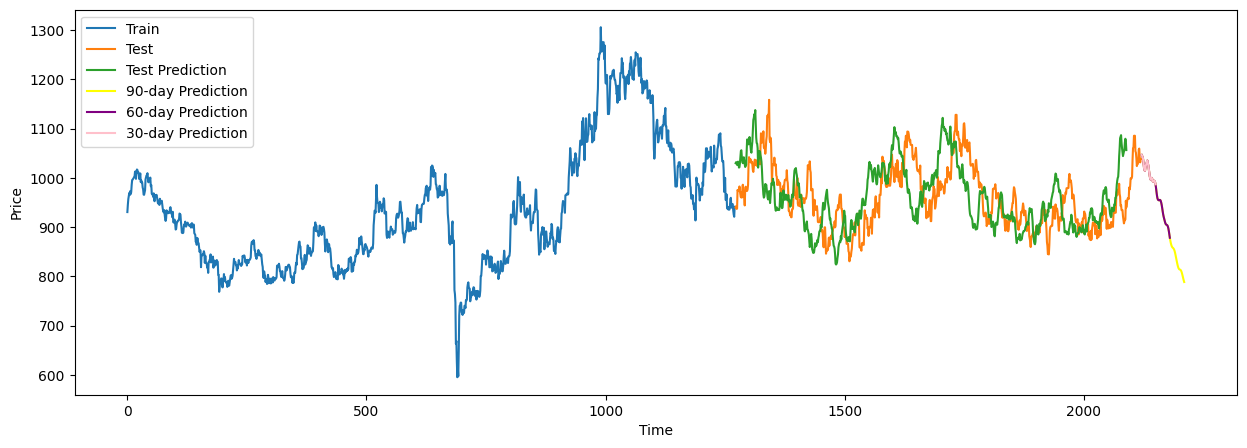

In [24]:
plt.figure(figsize=(15, 5))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, scaler.inverse_transform(train_data), label='Train')

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

test_pred_index = pd.RangeIndex(start=train_size, stop=train_size+len(y_pred), step=1)
plt.plot(test_pred_index, y_pred, label='Test Prediction')

next_90days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_90), step=1)
plt.plot(next_90days_pred_index, lst_output_90, color='yellow', label='90-day Prediction')

next_60days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output_60), step=1)
plt.plot(next_60days_pred_index, lst_output_60, color='purple', label='60-day Prediction')

next_30days_pred_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+len(lst_output), step=1)
plt.plot(next_30days_pred_index, lst_output, color='pink', label='30-day Prediction')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()